In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_c11_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55          8.1372 ( 7.6819,  8.3270) ( 7.7815,  8.3355)  0.5540 (Jnode 106)\n',
 't_n56          8.0477 ( 7.5877,  8.2971) ( 7.6786,  8.3275)  0.6489 (Jnode 105)\n',
 't_n57          7.6960 ( 7.2575,  7.9688) ( 7.3234,  8.0038)  0.6805 (Jnode 104)\n',
 't_n58          6.8432 ( 6.4390,  7.1722) ( 6.4632,  7.1899)  0.7267 (Jnode 103)\n',
 't_n59          6.6728 ( 6.2771,  7.0069) ( 6.3029,  7.0249)  0.7220 (Jnode 102)\n',
 't_n60          6.4344 ( 6.0456,  6.7778) ( 6.0657,  6.7915)  0.7258 (Jnode 101)\n',
 't_n61          6.0764 ( 5.6889,  6.4369) ( 5.7038,  6.4487)  0.7449 (Jnode 100)\n',
 't_n62          3.0970 ( 1.7955,  4.1191) ( 1.8857,  4.1788)  2.2931 (Jnode 99)\n',
 't_n63          4.6872 ( 4.3539,  5.0915) ( 4.3325,  5.0613)  0.7287 (Jnode 98)\n',
 't_n64          3.5593 ( 2.9178,  4.1124) ( 2.9519,  4.1379)  1.1859 (Jnode 97)\n',
 't_n65          3.1687 ( 2.5204,  3.7631) ( 2.5212,  3.7637)  1.2425 (Jnode 96)\n',
 't_n66          2.4697 ( 1.8658,  3.0809) ( 1.8545,  3.06

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[8.1372,
 8.0477,
 7.696,
 6.8432,
 6.6728,
 6.4344,
 6.0764,
 3.097,
 4.6872,
 3.5593,
 3.1687,
 2.4697,
 1.6628,
 1.1013,
 0.476,
 3.6625,
 6.5443,
 6.3823,
 6.0338,
 4.4715,
 4.043,
 3.8073,
 6.371,
 6.1208,
 5.95,
 5.6263,
 5.2292,
 5.105,
 4.5095,
 4.1387,
 3.8144,
 2.8503,
 2.6326,
 4.5582,
 3.7963,
 6.2692,
 1.3062,
 6.1491,
 5.807,
 5.2419,
 4.9135,
 3.778,
 4.1842,
 5.0608,
 4.8987,
 4.596,
 3.5325,
 4.393,
 7.108,
 5.5674,
 3.7312,
 2.9105,
 5.4125]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_c11_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[8.2126,
 8.1459,
 7.5902,
 6.8374,
 6.578,
 6.2535,
 5.7854,
 3.3753,
 4.5932,
 3.4869,
 2.9768,
 2.2489,
 1.488,
 0.9797,
 0.4233,
 3.6312,
 6.2924,
 5.3229,
 5.7347,
 4.4041,
 3.8239,
 3.8127,
 6.3379,
 5.9854,
 5.7306,
 5.4056,
 4.9911,
 4.77,
 4.1689,
 3.7393,
 3.321,
 2.4907,
 2.1167,
 4.3125,
 3.5018,
 6.1616,
 1.7235,
 5.9629,
 5.5611,
 4.9628,
 4.5399,
 3.5036,
 3.6866,
 4.8304,
 4.469,
 3.8628,
 3.4864,
 4.1923,
 6.9753,
 5.5898,
 3.7919,
 3.6441,
 6.0905]

In [12]:
posterior_mean_iqtree

[8.1372,
 8.0477,
 7.696,
 6.8432,
 6.6728,
 6.4344,
 6.0764,
 3.097,
 4.6872,
 3.5593,
 3.1687,
 2.4697,
 1.6628,
 1.1013,
 0.476,
 3.6625,
 6.5443,
 6.3823,
 6.0338,
 4.4715,
 4.043,
 3.8073,
 6.371,
 6.1208,
 5.95,
 5.6263,
 5.2292,
 5.105,
 4.5095,
 4.1387,
 3.8144,
 2.8503,
 2.6326,
 4.5582,
 3.7963,
 6.2692,
 1.3062,
 6.1491,
 5.807,
 5.2419,
 4.9135,
 3.778,
 4.1842,
 5.0608,
 4.8987,
 4.596,
 3.5325,
 4.393,
 7.108,
 5.5674,
 3.7312,
 2.9105,
 5.4125]

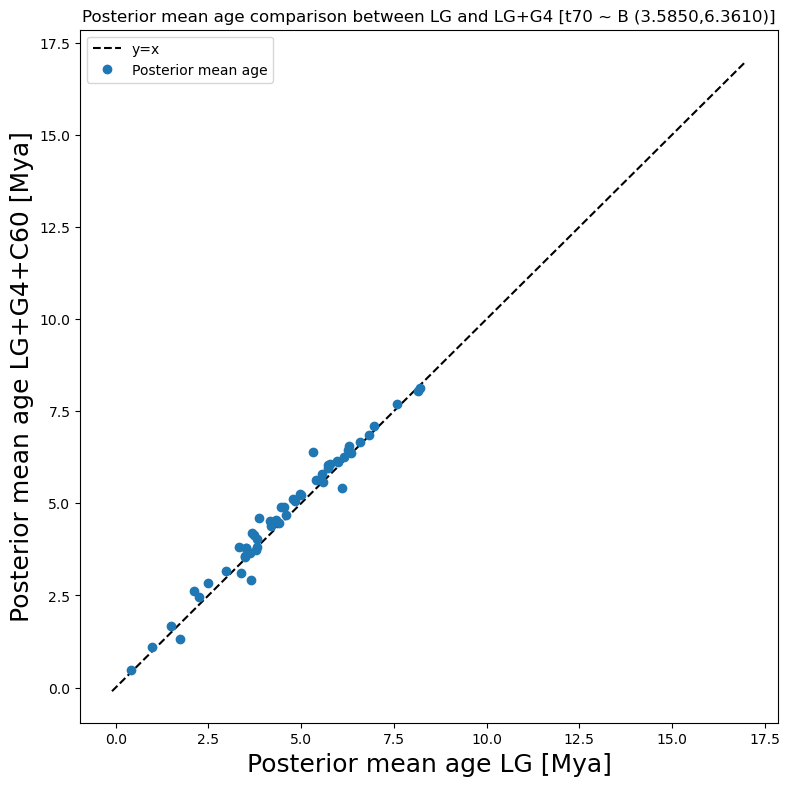

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [t70 ~ B (3.5850,6.3610)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_c11_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')